In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import platform

from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
from scipy.stats import *

from sklearn import * 
from sklearn import datasets
from sklearn.feature_extraction.text import *
from sklearn.metrics.pairwise import *
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.linear_model import *
from sklearn.datasets import *
from sklearn.cluster import *

from scipy.cluster.hierarchy import *

from scipy import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import platform
import matplotlib
from matplotlib import font_manager, rc

# '-' 기호 보이게 하기
matplotlib.rcParams['axes.unicode_minus'] = False
# 윈도우
if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

<class 'numpy.ndarray'> 1
[1.95465882]
3.106265947757168


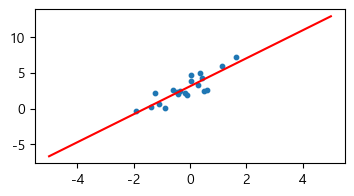

In [3]:
## 데이터 수집 단계
## ex) 몸무게 => 고혈압
## 단일 데이터를 강제로 만듦 
# 예) 몸무게 --> 고혈압
n_samples = 20
x = np.random.randn(n_samples) #평균0, 표준편차1
w = 2   ##기울기
b = 3   ## y절편
y = w*x + b + np.random.randn(n_samples)  
plt.figure(figsize=(4,2))
plt.scatter(x, y, s=10)  ## 탐색적 분석
print(type(x), x.ndim)  ## 1차원 배열

## ----------------------- 머신러닝 단계 -----------------------
leg = LinearRegression()  ## 데이터모델 만들기 --> 선형회귀
leg.fit(x.reshape(-1,1), y)  ##fit 적용 2차원 
## ------------------------------------------------------------
## 손실이 최적화되기 위해서 파라미터 값이 계속 변경되어 최종 모델 생성

print(leg.coef_)  ## 기울기
print(leg.intercept_)  ##y절편

XX = np.linspace(-5, 5, 200)
plt.plot(XX, leg.coef_ * XX + leg.intercept_, "r-")
plt.show()

[5.17918096 3.09268275]
3.8550103127152138


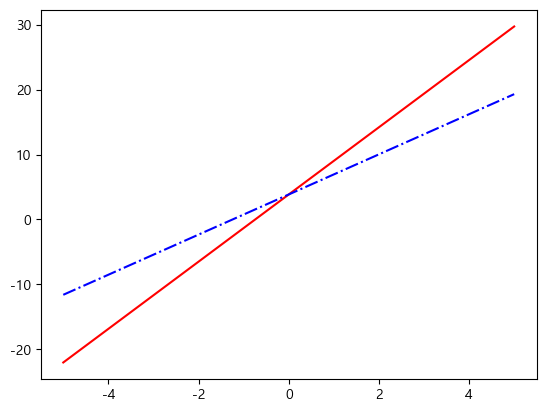

In [4]:
##  예) 몸무게, 나이 --> 고혈압
n_samples = 20
x1 = np.random.randn(n_samples)  ## 몸무게
x2 = np.random.randn(n_samples)  ## 나이 

np.random.seed(7)  ## 7번 랜덤으로 초기화
y = 5 * x1 + 3 * x2 + 4 + np.random.randn(n_samples)
X = pd.DataFrame({'x1':x1, 'x2':x2}) ## 선형회귀는 2차원 -> 입력이 1개

#leg = LinearRegression()
#leg.fit(X, y)
leg = LinearRegression().fit(X, y)

print(leg.coef_)
print(leg.intercept_)

XX = np.linspace(-5, 5, 200)
plt.plot(XX, leg.coef_[0] * XX + leg.intercept_, "r-")
plt.plot(XX, leg.coef_[1] * XX + leg.intercept_, "b-.")

plt.show()

# 선형 회귀 (Linear Regression) 분석

**공식**  
\[
y = ax + b
\]

---

## 기본 개념
- **회귀(Regression)**: 두 변수 간 관계가 일반화된 선형 관계의 평균으로 돌아간다는 것을 의미
- **선형성(Linearity)**: 두 변수 간 관계가 직선 형태로 설명될 수 있는 것
- **최소제곱 추정량(Least Square Estimator)**: 실제 값과 예측 값의 차이(오차 제곱)의 합을 최소화하는 방식으로 회귀선을 구함

---

## 회귀분석의 특징
- 변수 간의 **함수적 관계** 탐색
- 독립변수(X)와 종속변수(Y)의 영향 분석
- 독립변수가 1 증가할 때 결과(Y)가 얼마나 달라지는지를 확인
- 선형 방정식의 해석력이 높고, 근사값을 찾는 데 유리
- **비선형 관계**도 적절한 변환(다항 회귀, 로그 변환 등)을 통해 예측 가능

---

## 해석
- 계수 a: 기울기, 독립변수가 종속변수에 미치는 영향의 크기
- 절편 b: 독립변수가 0일 때 종속변수의 값


# 회귀분석 (Regression Analysis)

## 1. 선형 회귀분석 (Linear Regression Analysis)
- 설명변수와 종속변수 간의 관계를 **일차식(직선)**으로 모델링하여 분석
- 종속변수와 설명변수 사이의 **선형 관계**를 나타내는 회귀식을 통해 예측값 계산

---

## 2. 비선형 회귀분석 (Nonlinear Regression Analysis)
- 설명변수와 종속변수 간의 관계가 **일차식이 아닌 곡선** 또는 다항식으로 모델링하여 분석
- 종속변수와 설명변수 사이의 **비선형 관계**를 나타내는 곡선을 통해 예측값 계산

---

## 회귀분석의 유형
- **단순 회귀분석 (Simple Regression Analysis)**  
  설명변수가 1개인 모델

- **다중 회귀분석 (Multiple Regression Analysis)**  
  설명변수가 여러 개인 모델

- **로지스틱 회귀분석 (Logistic Regression Analysis)**  
  종속변수가 이항형(예/아니오 등)일 경우 분석하는 방법

---

## 구조적 구분
- **독립변수의 수**  
  - 1개 → 단순 회귀분석  
  - 2개 이상 → 다중 회귀분석  

- **독립변수의 형태**  
  - 동간/비율척도 → 일반 회귀분석  
  - 명목/서열척도 → 더미 변수를 이용한 회귀분석  

- **관계 형태**  
  - 선형 → 선형 회귀분석  
  - 비선형 → 비선형 회귀분석


# 다중 선형 회귀 (Multiple Linear Regression)

## 정의
- 여러 개의 독립변수를 이용한 회귀 예측 모델
- 영어: multiple linear regression

---

## 예시
- **혈압 예측**: 연령뿐 아니라 몸무게를 같이 고려
  - 종속 변수(Y): 혈압
  - 독립 변수(X): 연령, 몸무게

---

## 다중 선형 회귀식
$$
y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \cdots + \beta_{p}x_{p}
$$

- \(p\): 회귀 분석에 사용되는 독립 변수의 총 개수

---

## 용어 정리 (***)
- **종속 변수 (Dependent Variable)**  
  - 목적 변수(Target), Outcome 변수, Response 변수, Label

- **독립 변수 (Independent Variable)**  
  - Predictor, 설명 변수(Explanatory Variable), 특징(Feature)


In [5]:
num_epoch = 10  ## epoch : 학습의 수
lr = 0.9  ##학습률
np.random.seed(7)

w1 = np.random.uniform() # 몸무게
w2 = np.random.uniform() # 나이
b = np.random.uniform()  # 노이즈 값

print(w1)
print(w2)
print(b)

0.07630828937395717
0.7799187922401146
0.4384092314408935


In [6]:
for epoch in range(num_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = np.abs(y_pred - y).mean()
    print(f"{epoch:2} w1 = {w1:.6f},  w2 = {w2:.6f}, b = {b:.6f} , error = {error:.6f}")

    w1 = w1 - lr*((y_pred - y)* x1).mean()
    w2 = w2 - lr*((y_pred - y)* x2).mean()
    b = b - lr*((y_pred - y)).mean()

 0 w1 = 0.076308,  w2 = 0.779919, b = 0.438409 , error = 5.517529
 1 w1 = 3.933140,  w2 = 2.514540, b = 4.569556 , error = 1.225552
 2 w1 = 4.538145,  w2 = 2.984382, b = 4.184038 , error = 0.775646
 3 w1 = 4.838122,  w2 = 3.119734, b = 4.025162 , error = 0.657030
 4 w1 = 4.989977,  w2 = 3.144439, b = 3.947169 , error = 0.645840
 5 w1 = 5.070880,  w2 = 3.137609, b = 3.906834 , error = 0.651432
 6 w1 = 5.115798,  w2 = 3.125149, b = 3.884965 , error = 0.653221
 7 w1 = 5.141526,  w2 = 3.114408, b = 3.872658 , error = 0.653699
 8 w1 = 5.156589,  w2 = 3.106664, b = 3.865541 , error = 0.653758
 9 w1 = 5.165540,  w2 = 3.101489, b = 3.861346 , error = 0.653705


# 회귀의 손실 함수 (Loss Function)

## 정의
- **손실함수 (loss function)**  
  모델의 예측값과 실제 값의 **차이(오차, error)** 를 계산하는 함수
- 손실함수의 목적:  
  오차를 줄이는 방향으로 모델을 **최적화(학습)**

---

## 회귀분석에서 자주 쓰이는 손실 함수
- **MSE (Mean Square Error, 평균제곱오차)**  
  오차 제곱의 합을 평균한 값  
  - N: 배치 크기  

$$
MSE = \frac{1}{N} \sum_{k=1}^{N} (y_k - \hat{y}_k)^2
$$

---

## 파라미터 개념
- **Hyperparameter (하이퍼파라미터)**  
  - 사람이 직접 선택하는 변수  
  - 예: 배치 크기, 학습률 등  

- **Parameter (파라미터)**  
  - 기계 학습 과정에서 자동으로 갱신되는 변수  
  - 예: 가중치 \(w\), 편향 \(b\)


In [8]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [16]:
iris.data[:5] #데이터.head(3)-> 판다스, 데이터[:]-> 넘파이

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [17]:
type(iris) ## 넘파이 기반의 데이터 타입

sklearn.utils._bunch.Bunch

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
X_all = iris.data

In [13]:
X_all[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [14]:
## 데이터의 피처 값 축소: 전처리
X = X_all[:, 0] # sepal Length
y = X_all[:, 2] # petal Lenghh
print(X[0:5])
print(y[0:5])

[5.1 4.9 4.7 4.6 5. ]
[1.4 1.4 1.3 1.5 1.4]


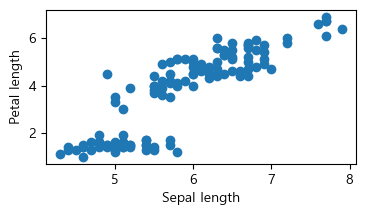

In [18]:
# ***
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

plt.figure(figsize=(4,2))
plt.scatter(X_train, y_train, marker='o')
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.show()

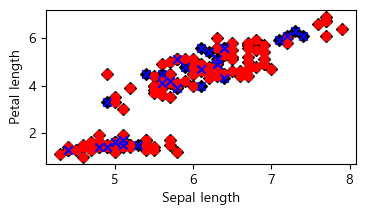

In [25]:
plt.figure(figsize=(4,2))
plt.scatter(X, y, marker='D', c='k')
plt.scatter(X_train, y_train, marker='o', c='r')
plt.scatter(X_test, y_test, marker='x', c='b')
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.show()

In [27]:
# 선형회귀 -----------------------
linr = LinearRegression()
linr.fit(X_train.reshape(-1,1), y_train)
# --------------------------------

a=linr.coef_ # 선형회귀 모델의 기울기 값
print(a)
b=linr.intercept_ # 선형회귀 모델의 y절편 값
print(b)

print("Score: {:.3f}".format(linr.score(X_test.reshape(-1, 1), y_test)))

[1.84274636]
-7.068567481226074
Score: 0.759


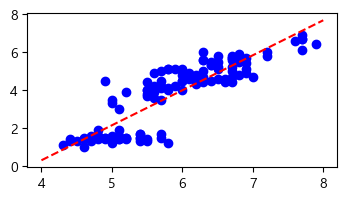

In [28]:
XX = np.linspace(4, 8, 20)
plt.figure(figsize=(4,2))
plt.scatter(X_train, y_train, marker='o', color='b')
plt.plot( XX, a*XX+b, "r--")
plt.show()

In [29]:
X, y = iris.data, iris.target
X[0:2, :], y[0:2]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2]]),
 array([0, 0]))

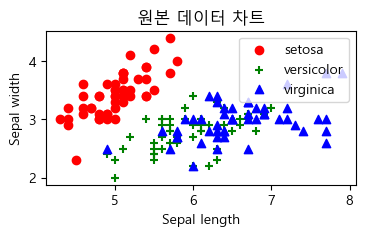

In [30]:
plt.figure(figsize=(4,2))
markers = ['o', '+', '^']
co=['r', 'g', 'b']
for i in range(3):
    xs = X[:, 0][y==i]
    ys = X[:, 1][y==i]
    plt.scatter(xs, ys, marker=markers[i], color=co[i])
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("원본 데이터 차트")
plt.show()

In [42]:
Y2 = y.copy()
Y2[(Y2==2)] = 1
Y2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

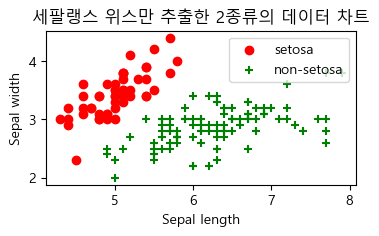

In [43]:
plt.figure(figsize=(4,2))
markers = ['o', '+', '^']
co=['r', 'g', 'b']
leg=['setosa', 'non-setosa']
for i in range(3):
    xs = X[:, 0][Y2==i]
    ys = X[:, 1][Y2==i]
    plt.scatter(xs, ys, marker=markers[i], color=co[i])
plt.legend(leg, loc=1)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("세팔랭스 위스만 추출한 2종류의 데이터 차트")
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y2, test_size=0.2, random_state=5)

In [45]:
linr = LinearRegression()
linr.fit(X_train, y_train)

a=linr.coef_ 
b=linr.intercept_ 

print("Score: {:.3f}".format(linr.score(X_test, y_test)))

Score: 0.884
